In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
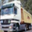

In [ ]:
X_train[1]

In [ ]:
X_train[0].max()

255

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[0].max()

1.0

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

#Modeling

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, input_shape=(32,32,3),kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16,kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.fit(X_train, y_train_enc, epochs=5, validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 34s 26ms/step - loss: 1.5934 - accuracy: 0.4302 - val_loss: 1.4679 - val_accuracy: 0.4959
Epoch 2/5
1250/1250 [==============================] - 34s 27ms/step - loss: 1.3666 - accuracy: 0.5218 - val_loss: 1.3002 - val_accuracy: 0.5544
Epoch 3/5
1250/1250 [==============================] - 32s 25ms/step - loss: 1.2915 - accuracy: 0.5515 - val_loss: 1.2883 - val_accuracy: 0.5573
Epoch 4/5
1250/1250 [==============================] - 32s 25ms/step - loss: 1.2401 - accuracy: 0.5721 - val_loss: 1.2443 - val_accuracy: 0.5649
Epoch 5/5
1250/1250 [==============================] - 31s 25ms/step - loss: 1.2084 - accuracy: 0.5801 - val_loss: 1.2481 - val_accuracy: 0.5652


In [ ]:
pred = model.predict(X_test)

313/313 [==============================] - 2s 8ms/step


In [ ]:
y_pred = pred.argmax(axis=1)

In [ ]:
y_test

array([[3],
       [8],
       [8],
       ...,
       [5],
       [1],
       [7]], dtype=uint8)

In [ ]:
# Importing Evaluation matrces
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

Accuracy :  0.5733
--------------------------------------------------
F1 :  [0.61816653 0.68996618 0.44213974 0.43059701 0.50625711 0.41880342
 0.64861938 0.65445026 0.66439024 0.66666667]
--------------------------------------------------
Reacll :  [0.735 0.612 0.405 0.577 0.445 0.343 0.599 0.625 0.681 0.711]
--------------------------------------------------
Precision :  [0.53338171 0.79069767 0.48677885 0.34345238 0.58707124 0.53761755
 0.70720189 0.68681319 0.64857143 0.62753751]
--------------------------------------------------
Confusion Matrix....
 [[735  22  33  27  14   4  11  17  82  55]
 [ 55 612  14  18   8   8  22   8  72 183]
 [128   9 405 159  88  75  47  42  28  19]
 [ 59  17  79 577  44  75  47  33  42  27]
 [ 61  11 106 171 445  27  62  90  18   9]
 [ 38   3  71 390  30 343  24  64  24  13]
 [ 14   6  62 180  63  21 599  14  29  12]
 [ 29   4  43 107  54  68  12 625   9  49]
 [183  38   6  18   4   6   5   4 681  55]
 [ 76  52  13  33   8  11  18  13  65 711]]
-------

NameError: name 'plt' is not defined

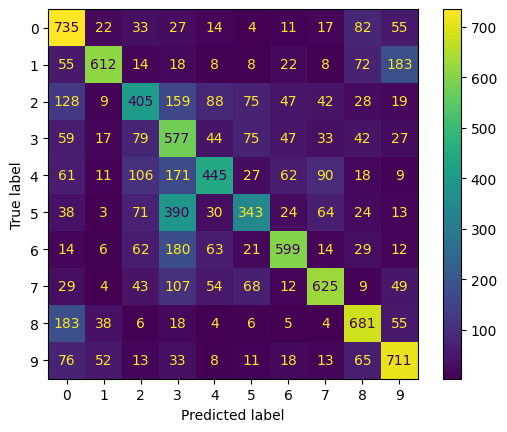

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)

# Precision
precision = precision_score(y_test, y_pred, average=None)

# Recall
recall = recall_score(y_test, y_pred, average=None)

# F1 Score
f1_sco = f1_score(y_test, y_pred, average=None)

# Confusion Matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Report
report = classification_report(y_test, y_pred)

print('Accuracy : ', accuracy)
print("-"*50)
print('F1 : ', f1_sco)
print("-"*50)
print('Reacll : ', recall)
print("-"*50)
print('Precision : ', precision)
print("-"*50)
print('Confusion Matrix....\n', confusion_mat)
print("-"*50)
print('Classification Report....\n', report)
print("-"*50)
print('Plotting Confusion Matrix...\n')
disp = ConfusionMatrixDisplay(confusion_mat, display_labels=None)
disp.plot()
plt.show()